Link of the data set

https://www.kaggle.com/datasets/yasserh/titanic-dataset/data

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv('Titanic Survival.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
# THis shows that the Class of Age and Cabin and Embarked do have null values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(columns=['Cabin'], inplace=True)  # Drop 'Cabin' due to too many missing values


C:\Users\DELL\AppData\Local\Temp\ipykernel_7800\3658513240.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_7800\3658513240.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [4]:
# Handling missing values without inplace
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Drop the 'Cabin' column due to too many missing values
#data = data.drop(columns=['Cabin'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


<Axes: >

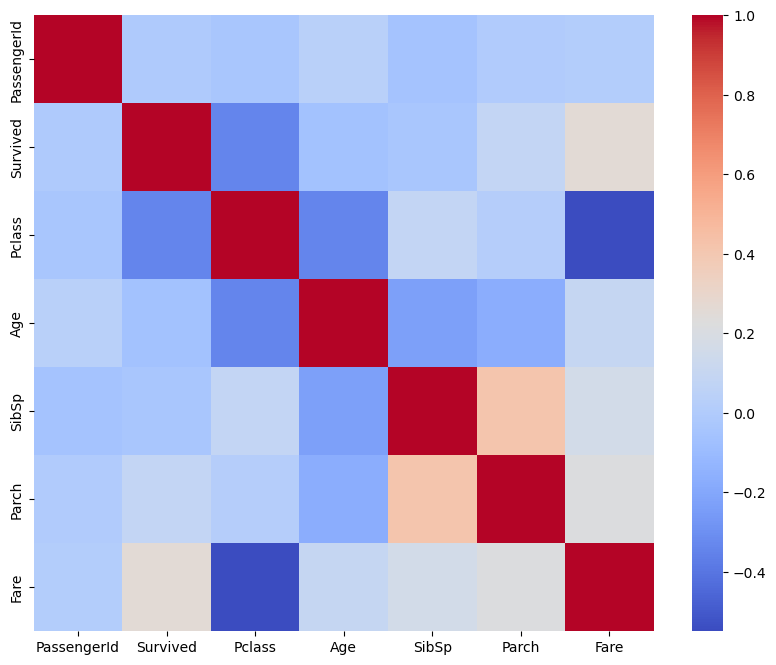

In [6]:
numeric_data = data.select_dtypes(include=[np.number])
data_corr = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data_corr,cmap='coolwarm')

<Figure size 1000x800 with 0 Axes>

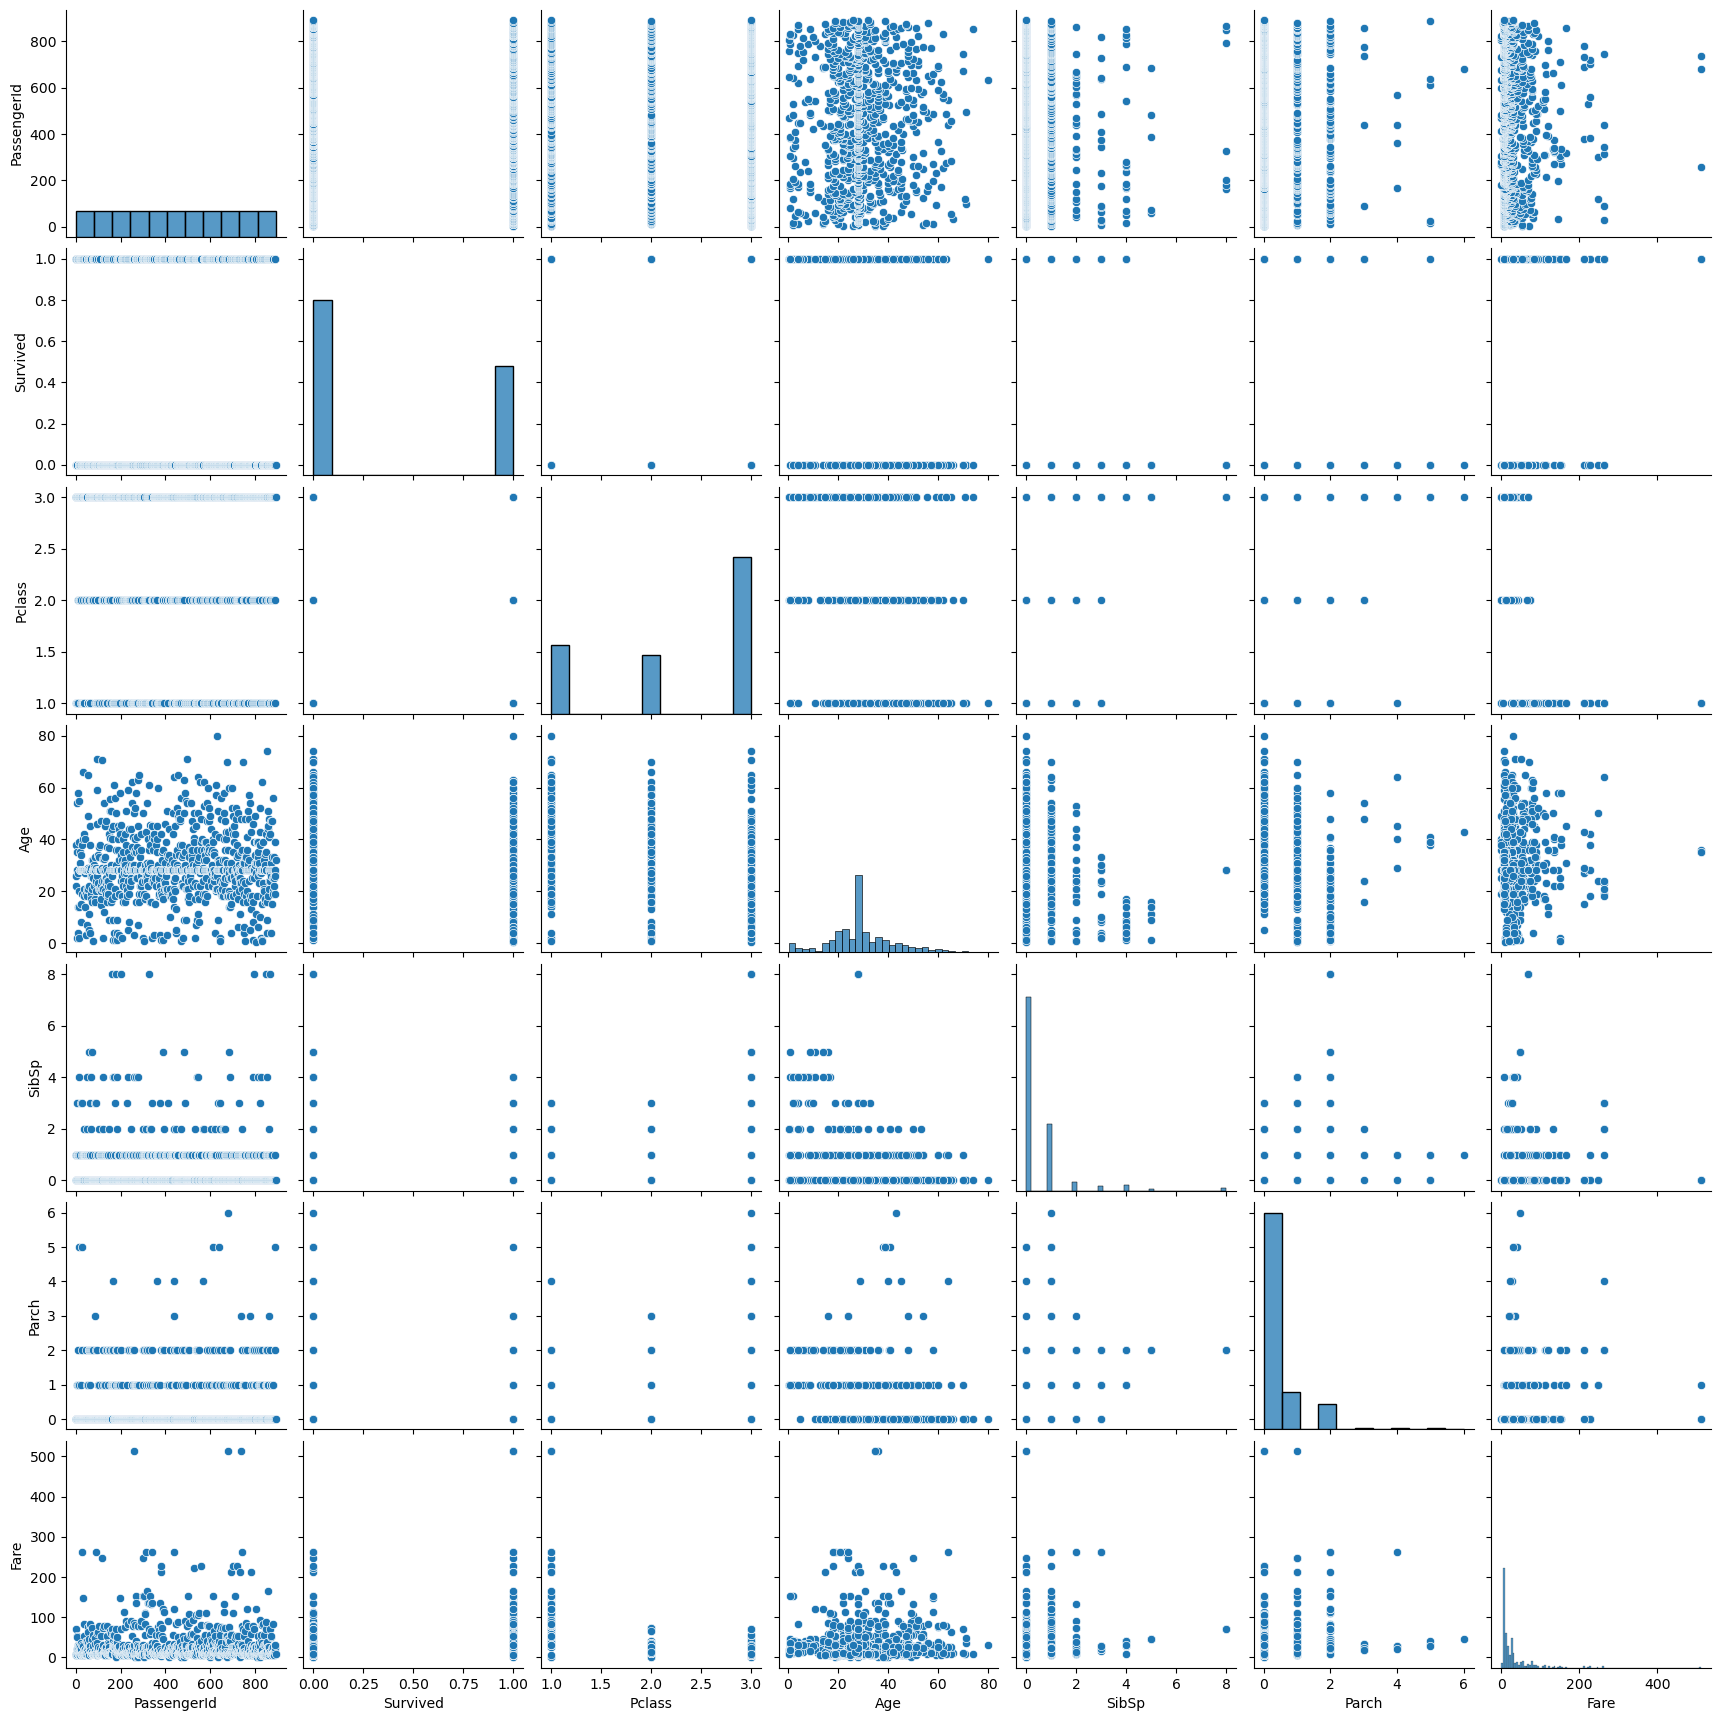

In [7]:
plt.figure(figsize=(10,8))
sns.pairplot(numeric_data)

In [8]:
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex']) 
data['Embarked'] = label_encoder.fit_transform(data['Embarked'])

X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
y_pred = clf.predict(X_test)

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8212290502793296
Confusion Matrix:
 [[92 13]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [14]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index=X.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)


Feature Importances:
           importance
Sex         0.271410
Fare        0.265010
Age         0.249995
Pclass      0.086957
SibSp       0.053685
Parch       0.039897
Embarked    0.033044


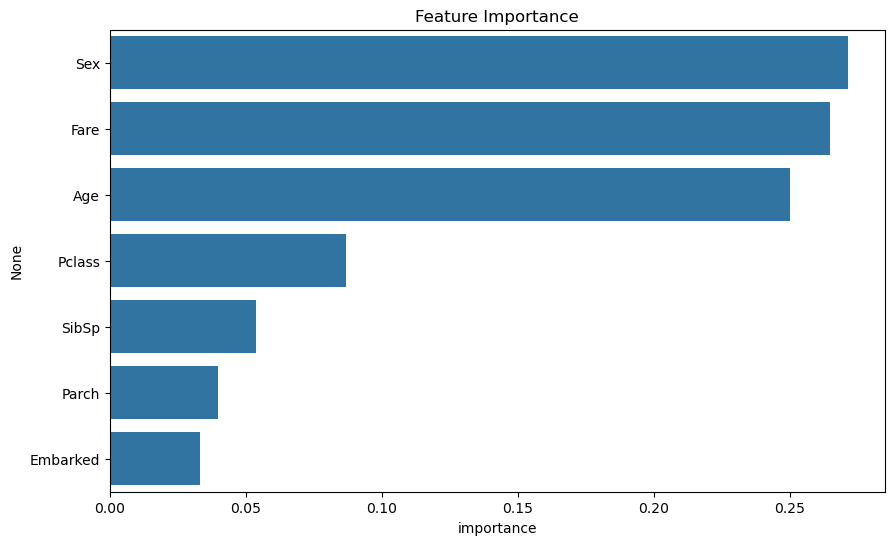

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

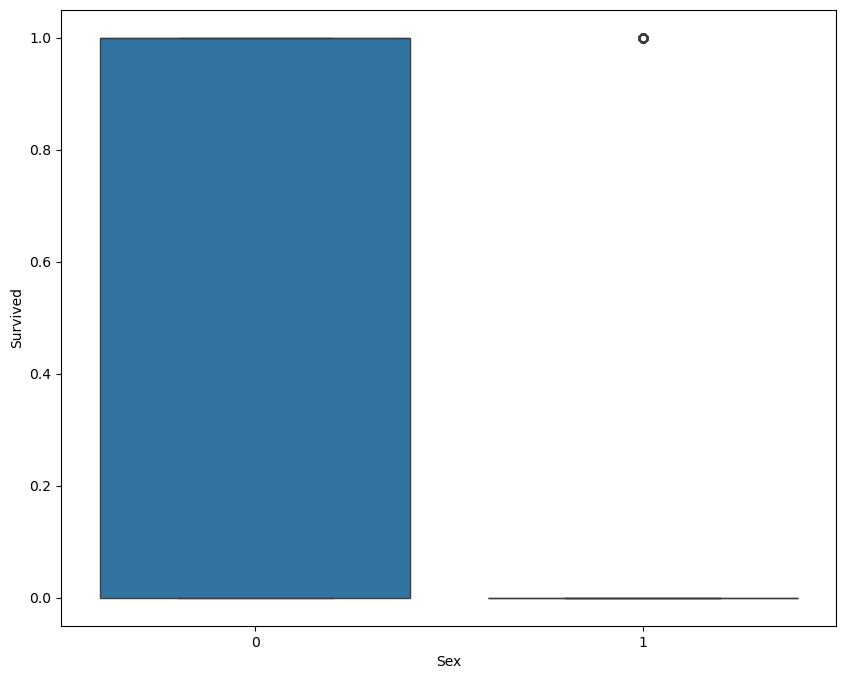

In [16]:
plt.figure(figsize=(10,8))
sns.boxplot(y=data['Survived'],x=data['Sex'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_7800\2525495681.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data['Survived'], y=data['Age'], palette='Set2')


<Axes: xlabel='Survived', ylabel='Age'>

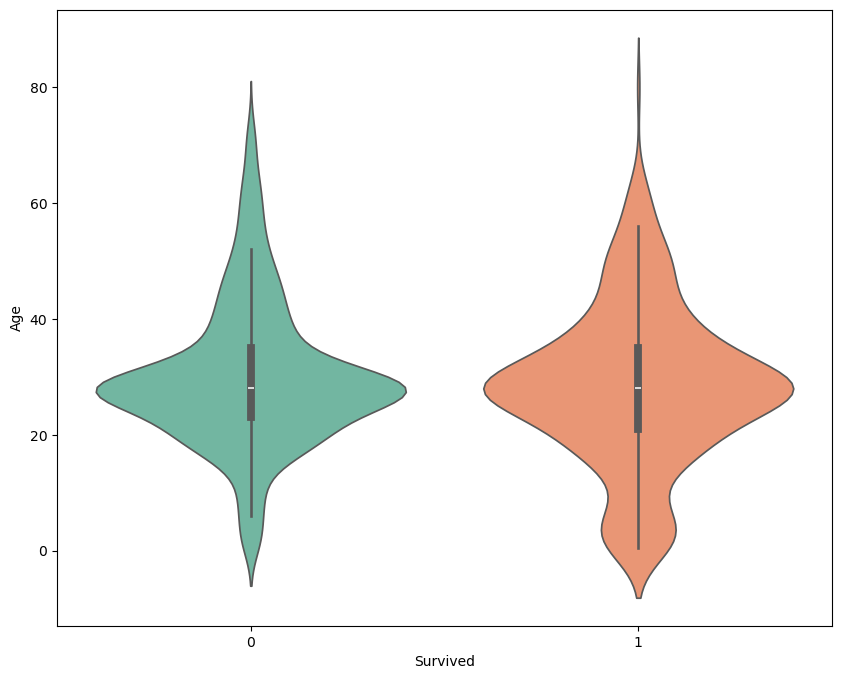

In [17]:
plt.figure(figsize=(10,8))
sns.violinplot(x=data['Survived'], y=data['Age'], palette='Set2')

<Axes: xlabel='Survived', ylabel='Fare'>

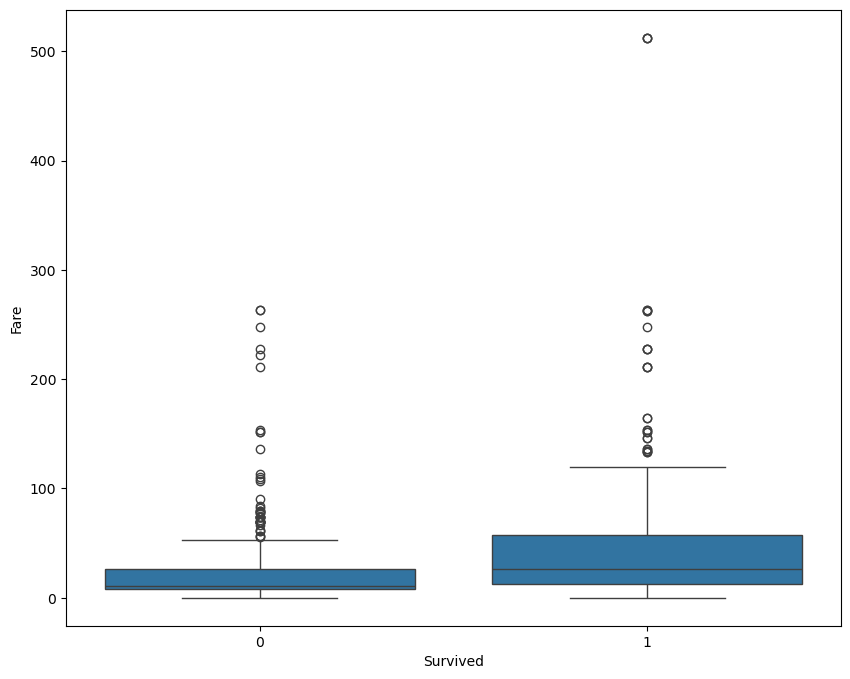

In [18]:
plt.figure(figsize=(10,8))
sns.boxplot(x=data['Survived'],y=data['Fare'])

Now the explanation can be that though there is no single significant factor behind the titanic survival. Age, Fare and Sex seems the most important as per the random forest algorithm. Higher fare, females and lesser aged individuals had higher odds for the survival.